In [1]:
# Importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv("madfhantr.csv")

In [3]:
loan.shape

(614, 13)

In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preprocessing

In [6]:
missing_values = loan.isnull().sum()
print("Columns with missing values : \n \n", missing_values[missing_values > 0].sort_values(ascending = False))

Columns with missing values : 
 
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


###  Dealing with missing values

In [7]:
missing_catg_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in missing_catg_cols :
    mode = loan[col].value_counts().index[0]
    loan[col].fillna(mode, inplace = True)

missing_num_cols = ['LoanAmount','Loan_Amount_Term']
for col in missing_num_cols:
    loan[col].fillna(loan[col].mean(), inplace = True)

In [8]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan = loan.drop("Loan_ID", axis = 1)

In [10]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
loan["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
loan["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
loan["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [15]:
loan["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
loan["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
loan["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [18]:
loan["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [19]:
# Replacing the dependents 3+ with 4

loan = loan.replace(to_replace = '3+', value = 4)


In [20]:
loan["Dependents"].astype(int).unique()

array([0, 1, 2, 4])

In [21]:
loan.replace({
    'Gender':{'Male':1,'Female':0},
    'Married':{'No':0,'Yes':1},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0},
    "Loan_Status":{'N':0,'Y':1}
    },
     inplace=True)

In [22]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Splitting the dataset

In [23]:
X = loan.drop("Loan_Status",axis =1).copy()
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [24]:
y = loan["Loan_Status"].copy()
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [25]:
y = y.replace(to_replace = ["N", "Y"], value = [0,1])

y.unique()

array([1, 0], dtype=int64)

## Predictive Model

## Logistic regression

In [26]:
#Splitting the dataset into train and test sets

X_train , X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier = classifier.fit(X_train, y_train)

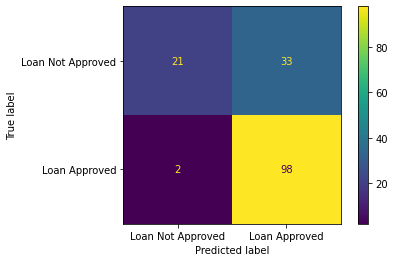

In [28]:
plot_confusion_matrix(classifier, X_test,y_test, display_labels =["Loan Not Approved", "Loan Approved"] )

In [29]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
y_pred= classifier.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on training data :  0.8195652173913044
Accuracy on testing data :  0.7727272727272727


### Preliminary Decision Tree

In [30]:
#Splitting the dataset into train and test sets

X_train , X_test, y_train, y_test = train_test_split(X, y, random_state =42)

#Creating decision tree and fiiting it to train data
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)


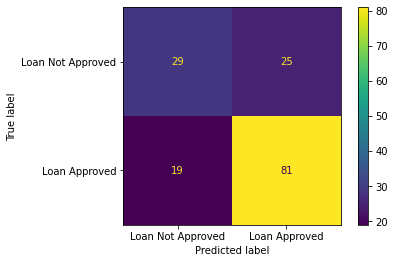

In [31]:
plot_confusion_matrix(clf_dt, X_test,y_test, display_labels =["Loan Not Approved", "Loan Approved"] )

In [32]:
X_train_prediction = clf_dt.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
y_pred= clf_dt.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on training data :  1.0
Accuracy on testing data :  0.7142857142857143


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = 1, max_depth = 5, n_estimators = 100)

classifier_rf = classifier_rf.fit(X_train, y_train)

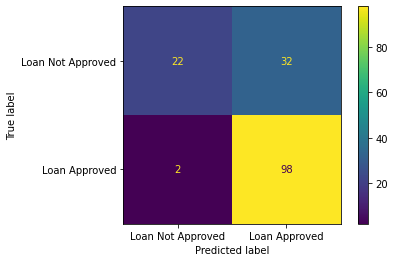

In [34]:
plot_confusion_matrix(classifier_rf, X_test, y_test, display_labels = ["Loan Not Approved", "Loan Approved"])

In [35]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = 1, max_depth = 5, n_estimators =200)

classifier_rf = classifier_rf.fit(X_train, y_train)

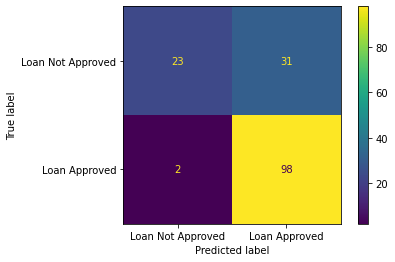

In [36]:
plot_confusion_matrix(classifier_rf, X_test, y_test, display_labels = ["Loan Not Approved", "Loan Approved"])

In [37]:
X_train_prediction = classifier_rf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
y_pred= classifier_rf.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on training data :  0.8304347826086956
Accuracy on testing data :  0.7857142857142857


###  SVM

In [38]:
# Scaling and centering the data

X_train_scaled = scale(X_train)
X_test_scaled  = scale(X_test)
 

In [39]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

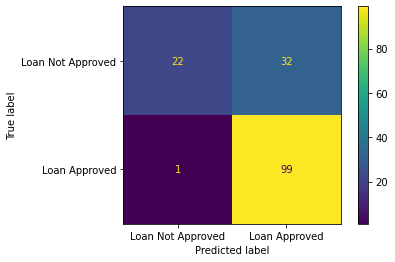

In [40]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels = ["Loan Not Approved", "Loan Approved"])

In [41]:
X_train_prediction = clf_svm.predict(X_train_scaled)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
y_pred= clf_svm.predict(X_test_scaled)
testing_data_accuray = accuracy_score(y_pred,y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on training data :  0.8304347826086956
Accuracy on testing data :  0.7857142857142857


## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf = knn_clf.fit(X_train, y_train)

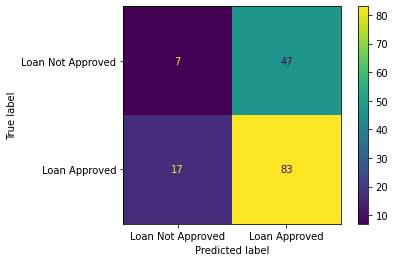

In [43]:
plot_confusion_matrix(knn_clf, X_test, y_test, display_labels = ["Loan Not Approved", "Loan Approved"])

In [44]:
X_train_prediction = knn_clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
y_pred= knn_clf.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on training data :  0.75
Accuracy on testing data :  0.5844155844155844


In [45]:
import sklearn
print(sklearn.__version__)

1.1.0


## ANN multilayer perceptron

In [46]:
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPClassifier

In [47]:
model = MLPClassifier(max_iter = 100)
print(model)

MLPClassifier(max_iter=100)


In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [50]:
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)

In [51]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [52]:
print("Best parmeters : ", clf.best_params_)

Best parmeters :  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [54]:
y_pred =  clf.predict(X_test)

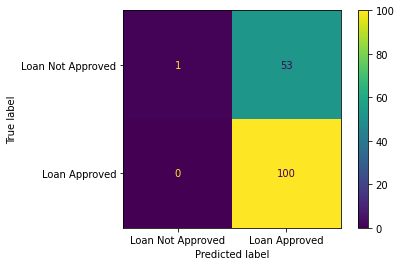

In [57]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = ["Loan Not Approved", "Loan Approved"])